# Data visualization with various cuts explored in our paper.
## Transverse-momentum-dependent Multiplicities of Charged Hadrons for HERMES Airapetian:2012ki and COMPASS Collaborations Adolph:2013stb. 
## New COMPASS data are 
### Penn State Berks, Fall 2018 
#### * Alexey  Prokudin*

In [1]:
from __future__ import division, print_function
from functools import partial, reduce
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore
import fitpack
import interface
import obslib.sidis.reader
from qcdlib.aux import AUX
from tools.config import conf
%matplotlib inline

/Users/avp5627/GIT/collinearity


This function reads data from multiple files and merges the data frames.

In [2]:
def get_data():
    # Merge all of the data tables
    return reduce(partial(pd.DataFrame.merge, how="outer"), map(pd.DataFrame, conf["sidis tabs"].values()))

upol_hermes_no_filters.py defines data files to read, no filters applied yet to the data selection. Here we read all HERMES multiplicities.

In [3]:
input_file = "../inputs/upol_hermes_no_filters.py"

CUTMIN = 0.99
CUTMAX = 5.28

filterstr = "dy>"
#filterstr = "yh_minus_yp>"

The interface.py allows to get configuration file from the file that we read.

In [4]:
interface.gen_config(input_file)  # Read file

conf["datasets"]["sidis"]["filters"][0] = filterstr + str(CUTMIN)  # Apply filter with min cut

conf["aux"] = AUX()
conf["sidis tabs"] = obslib.sidis.reader.READER().load_data_sets("sidis")
#conf['sidis stfuncs'] = obslib.sidis.stfuncs.STFUNCS()

data = get_data().sort_values("dy")

loading sidis data sets 1007

In [5]:
data["yh_minus_yp"] = data["yh"] - data["yp"] 
data["yi_minus_yp_over_yp"] = np.sqrt( ((data["yi"] - data["yp"])/data["yp"])**2 ) 
data["yf_minus_yh_over_yh"] = np.sqrt( ((data["yf"] - data["yh"])/data["yh"])**2 )
data["yi_minus_yp"] = np.sqrt( ((data["yi"] - data["yp"]))**2 ) 
data["yf_minus_yh"] = np.sqrt( ((data["yf"] - data["yh"]))**2 )

In [7]:
print(", ".join(sorted(data.columns)))

Ebeam, F2, Q2, R, W2, col, dy, hadron, i, lnR, obs, pT, stat_u, systabs_u, systole, systrel, target, value, x, y, yf, yf_minus_yh, yf_minus_yh_over_yh, yh, yh_minus_yp, yi, yi_minus_yp, yi_minus_yp_over_yp, yp, z


We create QCUT which is qT^2/Q^2

In [6]:
data["QCUT"] = (data["pT"] / data["z"])**2/ (data["Q2"])

In [7]:

def custom_label(label):
    if label =="Q2":
        label="$Q^2$"
    if label =="qT":
        label="$q_T$"
    if label =="qT":
        label="$q_T$"
    if label =="W2":
        label="$W^2\; (GeV^2)$"
    if label =="qToverQ":
        label="$q_T/Q$"
    if label =="qToverQ2":
        label="$q_T^2/Q^2$"
    if label =="dy":
        label="$y_p-y_h$"
    if label =="yh_minus_yp":
        label="$y_h-y_p$"
    if label =="yi":
        label="$y_i$"
    if label =="yf":
        label="$y_f$"
    if label =="yh":
        label="$y_h$"
    if label =="yp":
        label="$y_p$"
    if label =="yi_minus_yp":
        label="$|y_i - y_p|$"
    if label =="yf_minus_yh":
        label="$|y_f - y_h|$"
    if label =="yi_minus_yp_over_yp":
        label="$|(y_i - y_p)/yp|$"
    if label =="yf_minus_yh_over_yh":
        label="$|(y_f - y_h)/yh|$"
    if label =="R":
        label="$|R|$"    
    if label =="lnR":
        label="$ln(|R|)$"    
    return label

def color_plot(data,vert_lab, hor_lab, cmap="plasma", alpha=1.0):
    vert = data[vert_lab].values
    hor = data[hor_lab].values

    data_q = data["QCUT"]

    #colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    color_percentiles = partial(percentileofscore, data_q)
    colors = data_q.apply(color_percentiles)
    
    fig, ax = plt.subplots()

    #ax.set_title(custom_label(vert_lab) + " vs. " + custom_label(hor_lab))
    ax.set_ylabel(custom_label(vert_lab))
    ax.set_xlabel(custom_label(hor_lab))

    ax.scatter(hor, vert, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)
    
    #heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    #plt.colorbar(heatmap)

    fig.tight_layout()
    
    return fig, ax, vert, hor

In [10]:
data["qT"] = data["pT"] / data["z"]
data["qToverQ"] = data["pT"] / data["z"]/(data["Q2"]**0.5)
data["qToverQ2"] = (data["pT"] / data["z"])**2/(data["Q2"])

qT vs. qToverQ2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. Q2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 54

qT vs. dy
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qToverQ2 vs. Q2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 54

qToverQ2 vs. dy
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qToverQ2 vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

Q2 vs. dy
Number of points: 2660
Unique vertical values: 54
Unique horizontal values: 2660

Q2 vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 54
Unique horizontal values: 2660

dy vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660



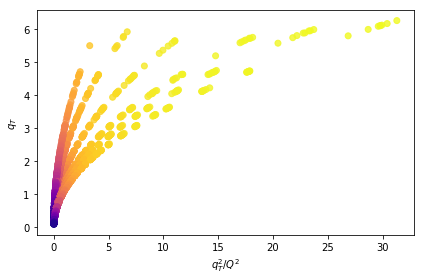

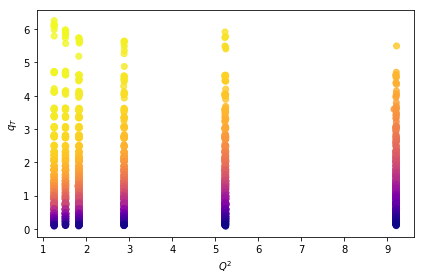

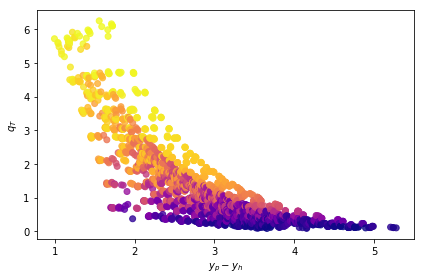

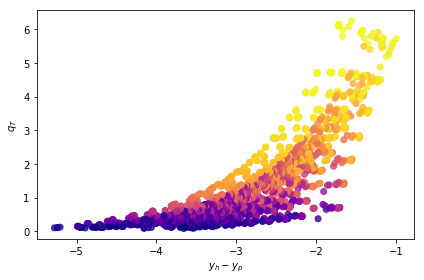

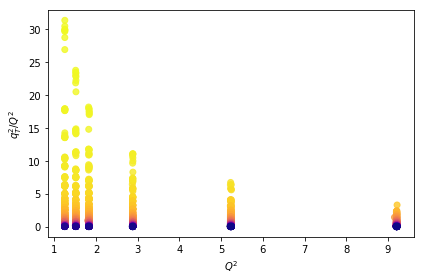

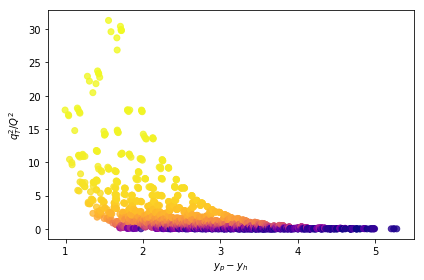

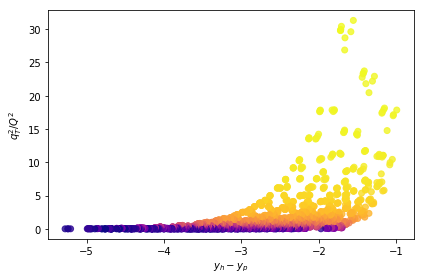

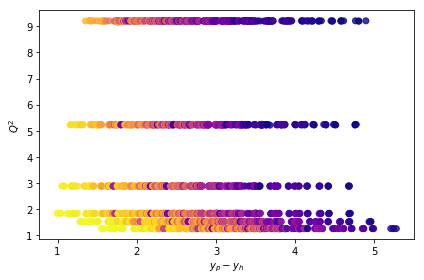

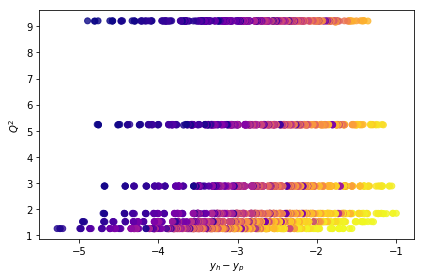

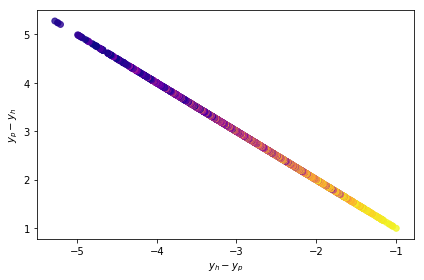

In [11]:
# labels = ("Q2", "pT", "x", "y", "z")
labels = ("qT","qToverQ2","Q2","dy","yh_minus_yp")

for v, h in combinations(labels, 2):
    fig, ax, vert, hor = color_plot(data,v, h, alpha=0.8)

    print(v + " vs. " + h)
    print("Number of points:", len(vert))
    print("Unique vertical values:", len(set(vert)))
    print("Unique horizontal values:", len(set(hor)))
    print()

# Let us study the whole HERMES data set

In [8]:
len(data)

2660

In [9]:
len(data.query("z<0.2"))

323

In [11]:
len(data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"))

978

In [13]:
len(data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"))

807

In [14]:
len(data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy > 1.25"))

807

Kinematics of the data set

In [13]:
print(np.min(data["x"]))
print(np.max(data["x"]))

print(np.min(data["z"]))
print(np.max(data["z"]))

print(np.min(data["Q2"]))
print(np.max(data["Q2"]))

print(np.min(data["Q2"]))
print(np.max(data["Q2"]))

print(np.min(data["pT"]))
print(np.max(data["pT"]))

0.03752366
0.410544
0.1311618
0.9481632
1.249131
9.218269
1.249131
9.218269
0.05684586
1.357048


In [14]:
data.keys()

Index([              u'Ebeam',                  u'F2',                  u'Q2',
                         u'R',                  u'W2',                 u'col',
                        u'dy',              u'hadron',                   u'i',
                       u'lnR',                 u'obs',                  u'pT',
                    u'stat_u',           u'systabs_u',             u'systrel',
                    u'target',               u'value',                   u'x',
                         u'y',                  u'yf',                  u'yh',
                        u'yi',                  u'yp',                   u'z',
                   u'systole',         u'yh_minus_yp', u'yi_minus_yp_over_yp',
       u'yf_minus_yh_over_yh',         u'yi_minus_yp',         u'yf_minus_yh',
                      u'QCUT',                  u'qT',             u'qToverQ',
                  u'qToverQ2'],
      dtype='object')

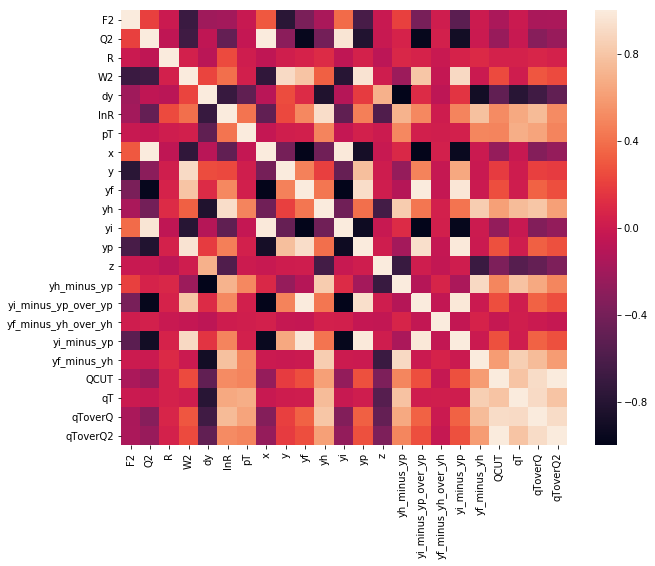

In [15]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
filtered_data = data.drop([
      'Ebeam','obs','value','stat_u','systabs_u','systrel','systole','i','target','hadron','col'
], axis=1)
corr = filtered_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

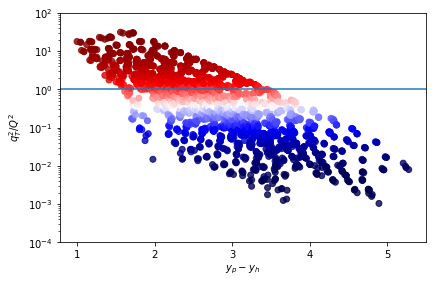

In [16]:

fig, ax, vert, hor = color_plot(data,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_all.pdf")
plt.show()

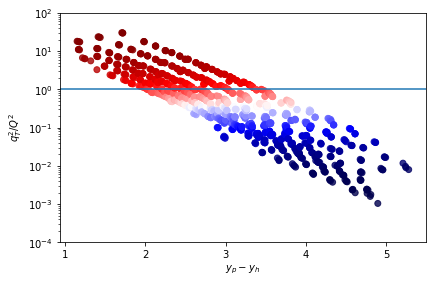

In [17]:
data_pion = data.query("hadron=='pi+' or hadron=='pi-'")
fig, ax, vert, hor = color_plot(data_pion,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_pion.pdf")
plt.show()

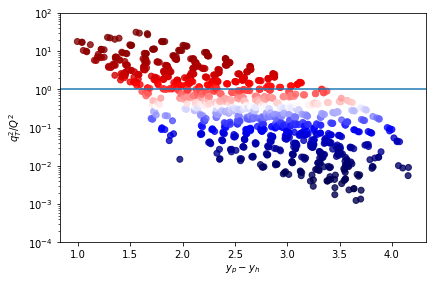

In [18]:
data_kaon = data.query("hadron=='k+' or hadron=='k-'")
fig, ax, vert, hor = color_plot(data_kaon,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_kaon.pdf")
plt.show()

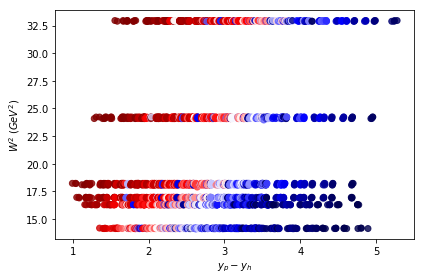

In [19]:
fig, ax, vert, hor = color_plot(data,"W2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_all_W2.pdf")
plt.show()

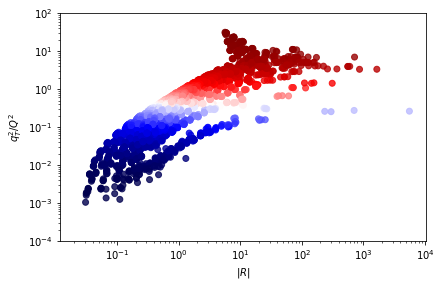

In [20]:
fig, ax, vert, hor = color_plot(data,"qToverQ2", "R",cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_all_qt_vs_R.pdf")
plt.show()

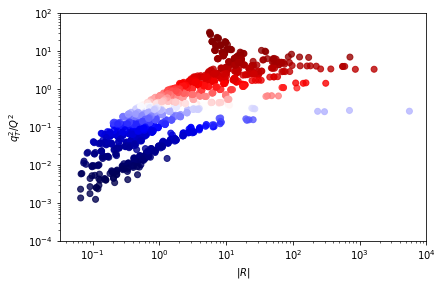

In [21]:
fig, ax, vert, hor = color_plot(data_kaon,"qToverQ2", "R",cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_kaon_qt_vs_R.pdf")
plt.show()

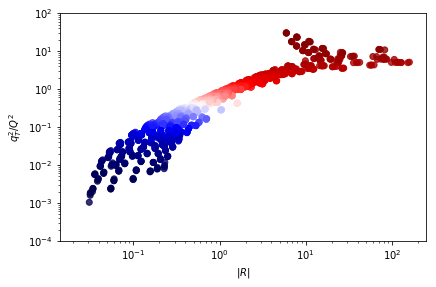

In [22]:
fig, ax, vert, hor = color_plot(data_pion,"qToverQ2", "R",cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_pion_qt_vs_R.pdf")
plt.show()

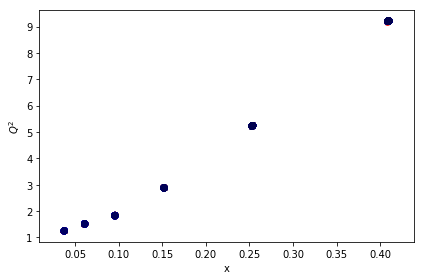

In [23]:
fig, ax, vert, hor = color_plot(data,"Q2", "x",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,100])
#plt.axhline(1,0,6)
#plt.savefig("../Figs/hermes_data_all.pdf")
plt.show()

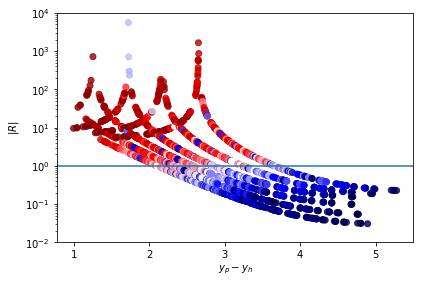

In [24]:
fig, ax, vert, hor = color_plot(data,"R", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,10000])
plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_all_R.pdf")
plt.show()

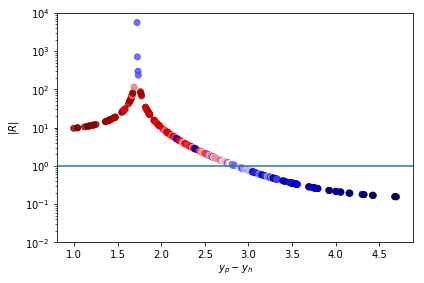

In [25]:
filtered_data = data.query("x<0.12 and x>0.094")
fig, ax, vert, hor = color_plot(filtered_data,"R", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,10000])
plt.axhline(1.,0,6)
#plt.savefig("../Figs/hermes_data_all_R.pdf")
plt.show()

In [26]:
filtered_data["z"]

2452    0.147065
2117    0.157919
789     0.158219
1123    0.166582
454     0.154651
118     0.163444
1447    0.165715
1782    0.170145
1122    0.158458
2451    0.155165
788     0.155659
2116    0.163791
1121    0.149136
2450    0.148644
787     0.150253
2115    0.149754
453     0.151025
117     0.152725
1781    0.151312
1446    0.157086
796     0.239232
2459    0.223189
1120    0.143012
2124    0.241625
786     0.143923
2449    0.143180
1130    0.247975
2114    0.144541
1454    0.232923
1789    0.234926
          ...   
1477    0.531219
1812    0.530479
140     0.419518
476     0.420395
1804    0.419745
1469    0.420000
499     0.880130
1827    0.884785
163     0.888629
1492    0.885831
491     0.694303
155     0.694509
1819    0.692933
1484    0.693687
147     0.533230
1476    0.531059
483     0.533751
1811    0.531144
498     0.889081
1491    0.892715
162     0.897135
1826    0.894733
490     0.693930
154     0.696049
1818    0.696641
1483    0.696686
497     0.888684
161     0.9016

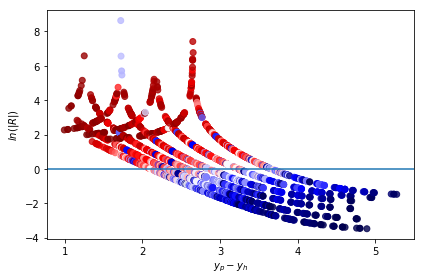

In [27]:
fig, ax, vert, hor = color_plot(data,"lnR", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
plt.axhline(0,0,6)
plt.savefig("../Figs/hermes_data_all_lnR.pdf")
plt.show()

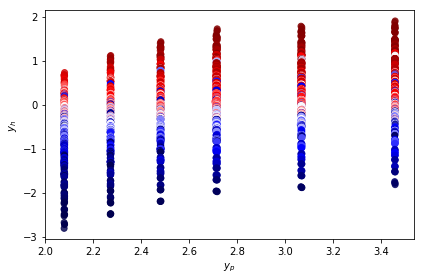

In [28]:
fig, ax, vert, hor = color_plot(data,"yh", "yp",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.show()

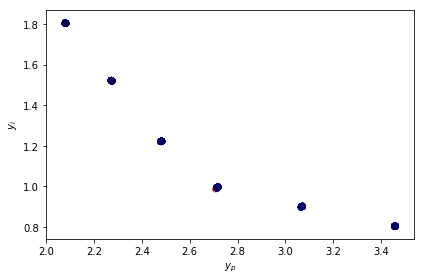

In [29]:
fig, ax, vert, hor = color_plot(data,"yi", "yp",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.show()

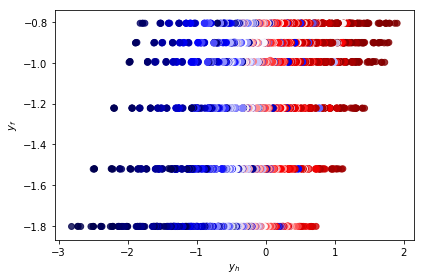

In [30]:
fig, ax, vert, hor = color_plot(data,"yf", "yh",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.show()

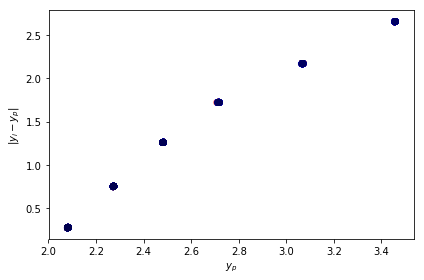

In [31]:
fig, ax, vert, hor = color_plot(data,"yi_minus_yp", "yp",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.savefig("../Figs/hermes_data_yi_minus_yp.pdf")
plt.show()

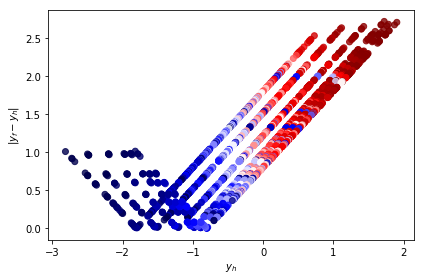

In [32]:
fig, ax, vert, hor = color_plot(data,"yf_minus_yh", "yh",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,10000])
#plt.axhline(0,0,6)
plt.savefig("../Figs/hermes_data_yf_minus_yh.pdf")
plt.show()

# Here we create filtered data with standard Torino cuts

In [33]:
torino_data = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9")

In [34]:
normal_length = len(torino_data)

len(torino_data.query("(pT/z)**2>=Q2"))

292

In [35]:
len(torino_data)

978

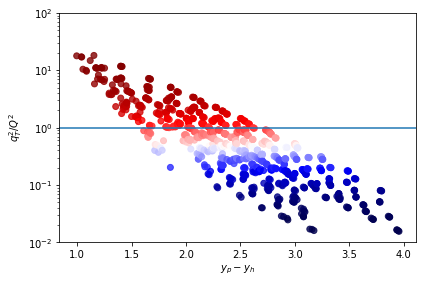

In [36]:
fig, ax, vert, hor = color_plot(torino_data,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,100])
plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_torino.pdf")
plt.show()


Let us see what happens if we add rapidity cut to Torino selection

In [37]:
torino_data_rap = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy>2.5")
len(torino_data_rap)

473

In [38]:
len(torino_data_rap.query("(pT/z)**2>=Q2"))

11

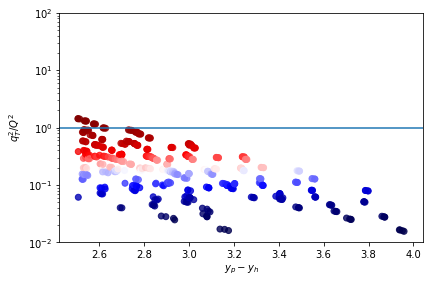

In [39]:
fig, ax, vert, hor = color_plot(torino_data_rap,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,100])
plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_torino_rapidity.pdf")
plt.show()

# Here we create filtered data with TMD inspired cuts

363


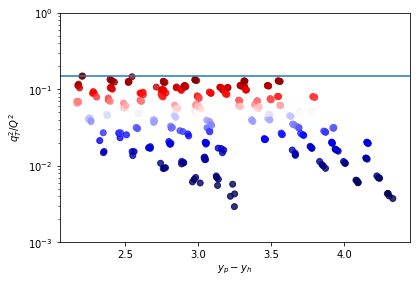

In [40]:
cut_data_qt = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2")
#cut_data_qt = data.query("z>0.2 and z<0.6 and Q2>1.69 and dy>2.5")
print(len(cut_data_qt))
fig, ax, vert, hor = color_plot(cut_data_qt,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,1])
plt.axhline(0.15,0,6)
plt.savefig("../Figs/hermes_data_rapidity.pdf")
plt.show()


# Here we explore R cut

In [41]:
print(np.min(data["lnR"]))
print(np.max(data["lnR"]))

-3.4822356106939383
8.62974462198517


463


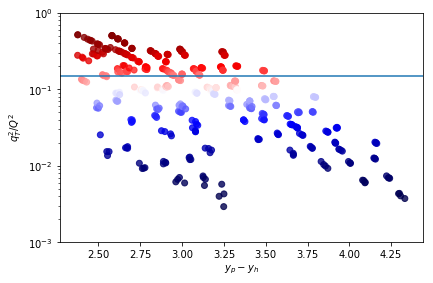

In [42]:
#cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2 and lnR<-1.5")
cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and lnR<-0.5")

print(len(cut_data_R))
fig, ax, vert, hor = color_plot(cut_data_R,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,1])
plt.axhline(0.15,0,6)
plt.savefig("../Figs/hermes_data_R.pdf")
plt.show()

36


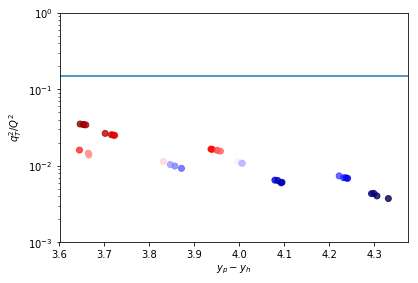

In [43]:
cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and lnR<-2.5")

print(len(cut_data_R))
fig, ax, vert, hor = color_plot(cut_data_R,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,1])
plt.axhline(0.15,0,6)
plt.savefig("../Figs/hermes_data_R25.pdf")
plt.show()

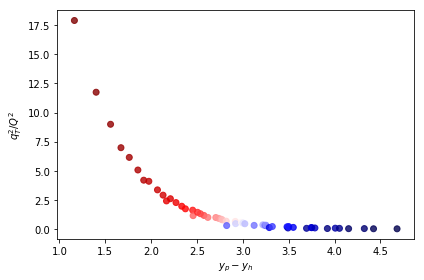

In [44]:
#torino_data_x = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and x<0.1 and target=='proton' and hadron=='pi+'")
torino_data_x = data.query("x<0.096 and x>0.094 and target=='proton' and hadron=='pi+'")

fig, ax, vert, hor = color_plot(torino_data_x,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.01,100])
#plt.axhline(0.15,0,6)
plt.show()